## Observations and Insights

## Dependencies and starter code

In [154]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume=combined_data['Tumor Volume (mm3)']
tumor_volume.describe()

count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

## Bar plots

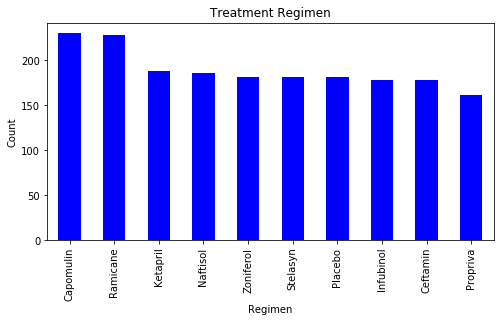

In [156]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count=combined_data["Drug Regimen"].value_counts()
regimen_count_figure=regimen_count.plot(kind="bar",facecolor="blue",figsize=(8,4))
plt.title("Treatment Regimen")
plt.ylabel("Count")
plt.xlabel("Regimen")
plt.show()

([<matplotlib.axis.XTick at 0x1298de050>,
 <a list of 10 Text xticklabel objects>)

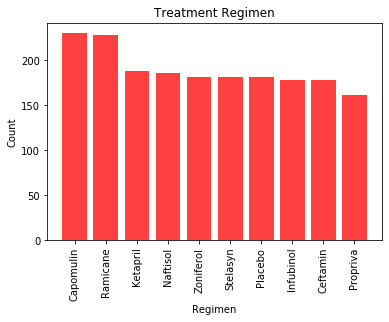

In [157]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis=np.arange(0,len(regimen_count),1)
tick_locations=[x for x in x_axis]
plt.title("Treatment Regimen")
plt.ylabel("Count")
plt.xlabel("Regimen")
plt.bar(x_axis, regimen_count, facecolor="red", alpha=0.75, align="center")
regimen=pd.DataFrame(regimen_count)
title=list(regimen.index.values)
plt.xticks(tick_locations, title,rotation="vertical")

## Pie plots

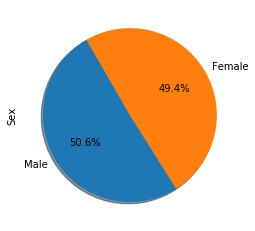

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=combined_data["Sex"].value_counts()
sex_count_figure=sex_count.plot(kind="pie",autopct="%1.1f%%", shadow=True, startangle=120)


([<matplotlib.patches.Wedge at 0x129a97790>,
 [Text(-0.9419582018196061, -0.5680798764476473, 'Male'),
  Text(0.941958201819606, 0.5680798764476477, 'Female')],
 [Text(-0.5137953828106941, -0.3098617507896258, '50.6%'),
  Text(0.5137953828106941, 0.30986175078962597, '49.4%')])

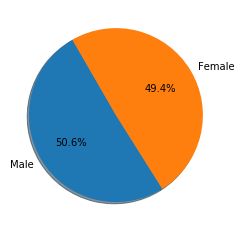

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=pd.DataFrame(sex_count)
labels=list(sex.index.values)
plt.pie(sex_count, labels=labels, autopct="%1.1f%%", shadow=True, startangle=120)


## Quartiles, outliers and boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
combined_data_treatment=combined_data[(combined_data['Drug Regimen']=="Capomulin")|(combined_data['Drug Regimen']=="Ramicane")|
                                      (combined_data['Drug Regimen']=="Ketapril")|(combined_data['Drug Regimen']=="Naftisol")].reset_index()
combined_data_treatment
combined_data_treatment_regimen=combined_data_treatment[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].copy()

combined_data_treatment_volume_group=combined_data_treatment_regimen.groupby(['Mouse ID'])
combined_data_treatment_volume_sum=combined_data_treatment_volume_group.sum().reset_index()
combined_data_treatment_volume_count=combined_data_treatment_volume_group.count()
combined_data_treatment_volume_count=combined_data_treatment_volume_count[['Drug Regimen']].copy().reset_index()
combined_data_treatment_volume_count
combined_data_treatment_volume_sum
combined_data_treatment_volume_merge=pd.merge(combined_data_treatment_volume_sum,combined_data_treatment_volume_count,on="Mouse ID")
combined_data_treatment_volume_merge['Drug Regimen']
combined_data_treatment_volume_merge['Tumor Volume (mm3)'] = combined_data_treatment_volume_merge['Tumor Volume (mm3)'].astype(float)
combined_data_treatment_volume_merge['Drug Regimen'] = combined_data_treatment_volume_merge['Drug Regimen'].astype(float)

combined_data_treatment_volume_merge['average volume'] = combined_data_treatment_volume_merge['Tumor Volume (mm3)']/combined_data_treatment_volume_merge['Drug Regimen']

quartiles = combined_data_treatment_volume_merge['average volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of volume is: 41.09677946
The upper quartile of volume is: 53.4089790005
The interquartile range of volume is: 12.312199540499996
The the median of volume is: 45.0 
Values below 22.628480149250006 could be outliers.
Values above 71.87727831125 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x129b11a90>,
 'caps': [<matplotlib.lines.Line2D at 0x129afc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1298e8290>],
 'medians': [<matplotlib.lines.Line2D at 0x129afcf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x129ade4d0>],
 'means': []}

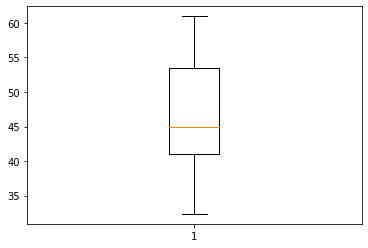

In [161]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(combined_data_treatment_volume_merge['average volume'] )

## Line and scatter plots

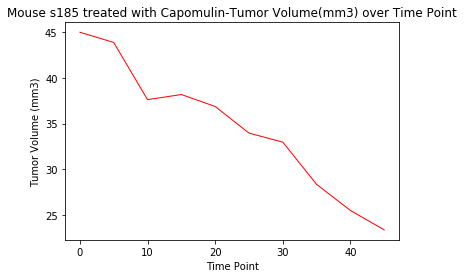

In [162]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

combined_data_treatment_Capomulin_s185=combined_data[(combined_data['Drug Regimen']=="Capomulin")&(combined_data['Mouse ID']=="s185")].reset_index()
plt.title("Mouse s185 treated with Capomulin-Tumor Volume(mm3) over Time Point")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(combined_data_treatment_Capomulin_s185['Timepoint'], combined_data_treatment_Capomulin_s185['Tumor Volume (mm3)'], color="red", linewidth=1)


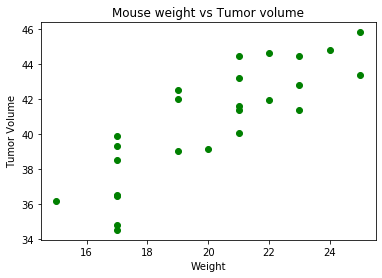

In [163]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
combined_data_treatment_Capomulin=combined_data[(combined_data['Drug Regimen']=="Capomulin")].reset_index()
combined_data_treatment_Capomulin.head()
combined_data_treatment_Capomulin_group=combined_data_treatment_Capomulin.groupby('Mouse ID')
mouse_weight_tumor_volume=combined_data_treatment_Capomulin_group.mean().reset_index()
plt.title("Mouse weight vs Tumor volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.scatter(mouse_weight_tumor_volume['Weight (g)'], mouse_weight_tumor_volume['Tumor Volume (mm3)'], marker="o", color="green")
plt.show()


In [168]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight= mouse_weight_tumor_volume.iloc[:,3]
tumor_volume = mouse_weight_tumor_volume.iloc[:,5]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values=mouse_weight_tumor_volume['Weight (g)']
y_values=mouse_weight_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is: {line_eq}")

The correlation between both factors is 0.84
The r-squared is: 0.8419363424694718
The linear regression model is: y = 0.95x + 21.55
